In [14]:
import GPy

import gp_retouch
from gp_retouch.image.image_processor import ImageProcessor
from gp_retouch.retoucher import Retoucher


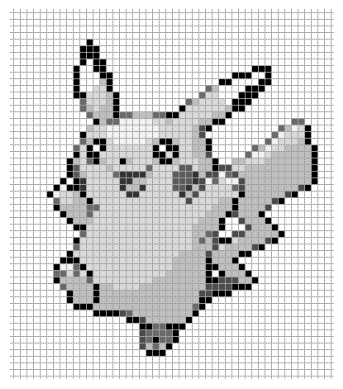

In [10]:
path_to_img = "../tests/data/pikachu.png"
image = gp_retouch.load_image(path_to_img, metadata={})
image.plot()

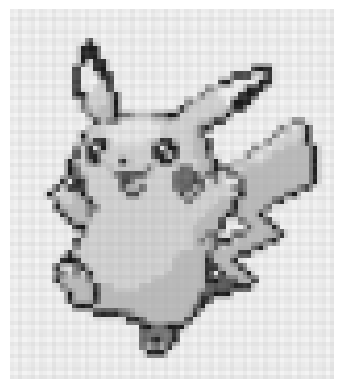

In [11]:
small_image = ImageProcessor.downscale(image, factor=0.2)
small_image.plot()

[47 46 55 ... 51 61 29]
[57 65 28 ... 40 69 48]


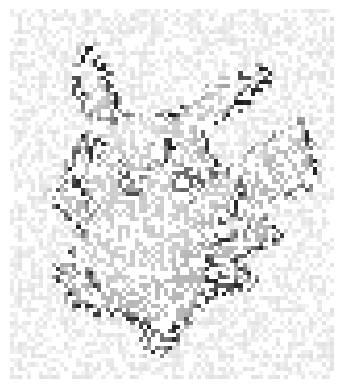

In [13]:
incomplete_img = ImageProcessor.drop_pixels(small_image, ratio=0.5)
incomplete_img.plot()

In [24]:
retoucher = Retoucher(GPy.kern.RBF(input_dim=2, variance=200.0, lengthscale=0.01))
retoucher.load_image(incomplete_img)

In [26]:
retoucher.learn_image(optimizer="bfgs", max_iters=10, messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i    f              |g|        
    01s20  01   1.755724e+05   4.826201e+10 
    08s44  07   1.267379e+05   4.196639e+05 
    15s48  12   1.266865e+05   1.329166e+08 
Runtime:     15s48
Optimization status: Maximum number of f evaluations reached



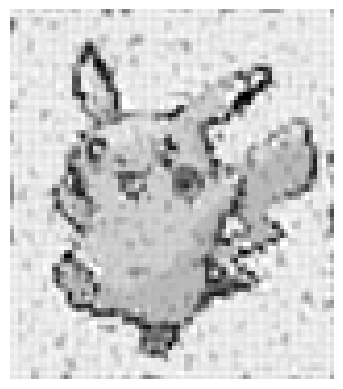

In [27]:
reconstructed_image = retoucher.reconstruct_image()
reconstructed_image.plot()